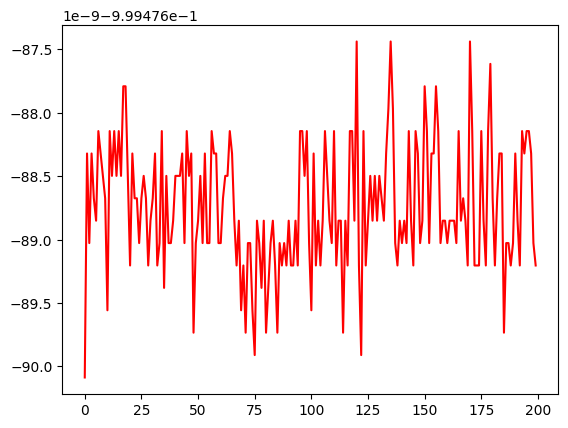

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import *

N_points = 200
R = 1
thetaspan = 2 * np.pi

# thetas = np.zeros(N_points)

# for i in range(N_points):
#     thetas[i] = i * thetaspan / N_points

thetas = np.linspace(0, thetaspan * (N_points-1)/(N_points), N_points)
thetas = thetas + thetaspan / N_points / 2

# thetas = np.linspace(0, thetaspan * N_points/(N_points + 1), N_points)

xs = R * np.cos(thetas)
ys = R * np.sin(thetas)

curve = np.array([xs, ys]).T

#Ok time to plate. Make sure forces are in perp direction, populate forces in the same way
step = 2 * np.pi * R / N_points
step_theta = 2 * np.pi / N_points

epsilon = step * 0.00001

# vdisps = np.random.rand(2 * len(curve), 2)
# vdisps = vdisps / np.linalg.norm(vdisps, axis=1)[:, np.newaxis]

# vdisps = np.zeros((2 * len(curve), 2))
# vdisps[0::2, 0] = 1
# vdisps[1::2, 0] = 1

vdisps = np.zeros((2 * len(curve), 2))
vdisps[0::2, :] = unit_normals(curve)
vdisps[1::2, :] = unit_normals(curve)
vdisps = vdisps * epsilon

# forces_perp = curve * p / R
A = populate_matrix(curve, step_theta, vdisps)

#here we do it forward, let's put in constant sigmas and see if the pressure comes out right

p = 1
sigmas = p / R * np.ones(len(curve)) #might have to divide by two
ms = np.zeros(len(curve))

state = np.zeros(2 * len(curve))

for i in range(len(curve)):
    state[2 * i] = sigmas[i]
    state[2 * i + 1] = ms[i]

pressures1 = np.dot(A, state)[0::2]
pressures2 = np.dot(A, state)[1::2]

for i, pressure in enumerate(pressures1):
    pressures1[i] = pressure / np.dot(unit_normals(curve)[i], vdisps[2 * i]) / ds(curve, i)

for i, pressure in enumerate(pressures2):

    pressures2[i] = pressure / np.dot(unit_normals(curve)[i], vdisps[2 * i + 1]) / ds(curve, i)

plt.plot(pressures1[:] , label='sigma', color='red')

In [4]:
pressures2[50]

np.float64(-0.999476088851081)

In [6]:
A[0]

array([ 1.57072314e-12,  1.99934258e-05, -4.93279934e-09, -9.99424433e-06,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [11]:
(A[0,2] + A[0, -2])/A[0,-2]

np.float64(1.9999999999999947)

In [12]:
l = [thetas[i]-thetas[i-1] for i in range(0,len(thetas))]

2 * np.pi + l[0]-l[1]

np.float64(-1.8041124150158794e-16)

In [4]:
pressures1[19]

np.float64(-0.9994760884976825)

In [5]:
print(A[5,2])
print(-np.dot(unit_normals(curve)[50], vdisps[50])*ds(curve, 50))

print(ds(curve, 5))
print(np.dot(unit_normals(curve)[50], vdisps[2 * 50]))

-4.932799338313114e-09
-6.978577208892717e-09
0.03141463462364138
3.141592653589794e-07


In [6]:
i = 0

point = curve[i]
temp = curve.copy()
temp[i] = point + vdisps[2 * i]
g1 = metric(temp, i, step_theta) 
g2 = metric(curve, i, step_theta)
dg = g1 - g2
print(g1, g2, dg)
print(curve[0], curve[1])
print(temp[0], temp[1])
print(curve[0,0]-temp[0,0])
print(vdisps[0])
np.linalg.norm(curve[i+1] - curve[i]) - np.linalg.norm(temp[1+i] - temp[i])

0.999917756102418 0.9999177560024185 9.999945316252479e-11
[0.99987663 0.01570732] [0.99888987 0.04710645]
[0.99987632 0.01570731] [0.99888987 0.04710645]
3.140042467153492e-07
[-3.14004247e-07 -9.86798100e-09]


np.float64(-1.570854557542134e-12)

In [7]:
0.5 * vdisps[4,0] ** 2 / ds(curve, 4)

np.float64(1.556948792211311e-12)

In [8]:
[np.linalg.norm(vdisps[i]) for i in range(15)]

[np.float64(3.141592653589794e-07),
 np.float64(3.141592653589794e-07),
 np.float64(3.141592653589794e-07),
 np.float64(3.141592653589794e-07),
 np.float64(3.141592653589794e-07),
 np.float64(3.141592653589794e-07),
 np.float64(3.1415926535897943e-07),
 np.float64(3.1415926535897943e-07),
 np.float64(3.141592653589794e-07),
 np.float64(3.141592653589794e-07),
 np.float64(3.141592653589794e-07),
 np.float64(3.141592653589794e-07),
 np.float64(3.141592653589794e-07),
 np.float64(3.141592653589794e-07),
 np.float64(3.141592653589794e-07)]

In [9]:
[np.dot(vdisps[2*i+1], curve[i+1] - curve[i]) for i in range(len(curve)-1)] 

[np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(2.0679515313825692e-25),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(4.1359030627651384e-25),
 np.float64(4.1359030627651384e-25),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(-4.1359030627651384e-25),
 np.float64(4.1359030627651384e-25),
 np.float64(0.0),
 np.float64(8.271806125530277e-25),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(-8.271806125530277e-25),
 np.float64(8.271806125530277e-25),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(8.271806125530277e-25),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(8.271806125530277e-25),
 np.float64(-8.271806125530277e-25),
 np.float64(-8.271806125530277e-25),
 np.float64(8.271806125530277e-25),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(4.1359030627651384e-25),
 np.float64(4.1359030627651384e-25),

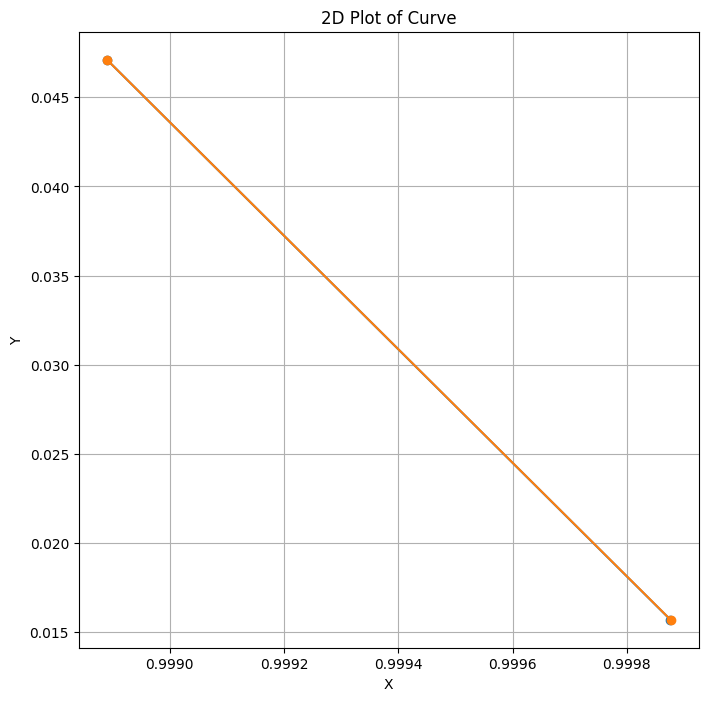

In [10]:

plt.figure(figsize=(8, 8))
#plt.plot(curve[0:2, 0], curve[0:2, 1], marker='o')
plt.plot(temp[i:i+2, 0], temp[i:i+2, 1], marker='o')
plt.plot(curve[i:i+2, 0], curve[i:i+2, 1], marker='o')

# plt.scatter(np.array([2-vdisps[0,0]]), np.array([0]), color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Plot of Curve')
plt.grid(True)
plt.show()